<a href="https://colab.research.google.com/github/teaminii/MachineLearning/blob/main/Logistric_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)


     |████████████████████████████████| 591.8 MB 607 bytes/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 23.2 MB 80.8 MB/s 
     |████████████████████████████████| 23.3 MB 1.4 MB/s 
     |████████████████████████████████| 23.3 MB 1.5 MB/s 
     |████████████████████████████████| 22.1 MB 1.2 MB/s 
     |████████████████████████████████| 22.1 MB 1.4 MB/s 
     |████████████████████████████████| 17.4 MB 714 kB/s 
     |████████████████████████████████| 17.3 MB 135 kB/s 
     |████████████████████████████████| 12.8 MB 42.9 MB/s 
     |████████████████████████████████| 12.7 MB 21.5 MB/s 
     |████████████████████████████████| 11.8 MB 29.7 MB/s 
     |████████████████████████████████| 5.9 MB 22.4 MB/s 
     |████████████████████████████████| 6.6 MB 32.0 MB/s 
     |████████████████████████████████| 6.6 MB 42.5 MB/s 
     |████████████████████████████████| 4.0 MB 43.5 MB/s 
     |████████████████████████████████| 10.2 MB 30.9 MB/s 
     

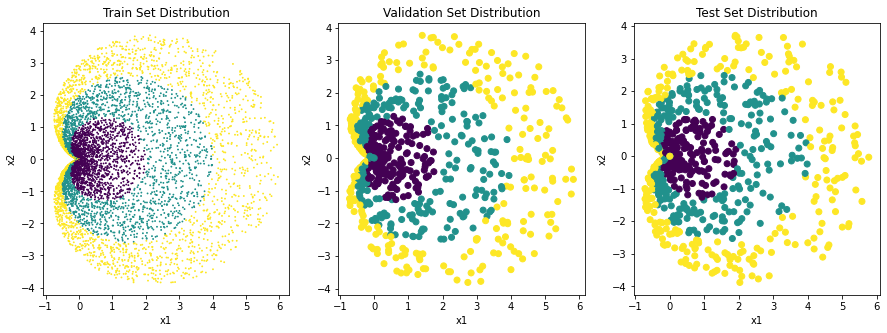

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


# Generating Dataset 
r = np.random.rand(10000)*3
theta = np.random.rand(10000)*2*np.pi
y = r.astype(int)   ##정수형으로 바꿨음 
r = r * (np.cos(theta) + 1)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X = np.array([x1, x2]).T

# Split Dataset into Train, Validation, Test
train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

# Visualize Each Dataset
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=0.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')


ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:, 0], val_X[:, 1], c=val_y)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

plt.show()

In [3]:
import torch
import torch.nn as nn

## 클래스가 3개니깐 W R 3차원
class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=3, bias=True)   ##2차원에서 3차원 in_feature = 2, out_feature = 3
    
    def forward(self, x):
        x = self.linear(x)
        # self.softmax = nn.Softmax() --> logsoftmax dksdp softmax가 들어가있기 때문에 학습이 제대로 이루어지지 않을 수 있다. 
        return x

    
class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=3)
        self.relu = nn.ReLU()

    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [4]:
cls_loss = nn.CrossEntropyLoss()


test_pred_y = torch.Tensor([[2,0.1],[0,1]])
test_true_y1 = torch.Tensor([1,0]).long()
test_true_y2 = torch.Tensor([0,1]).long()

print(cls_loss(test_pred_y, test_true_y1))
print(cls_loss(test_pred_y, test_true_y2))

tensor(1.6763)
tensor(0.2263)


1203 parameters


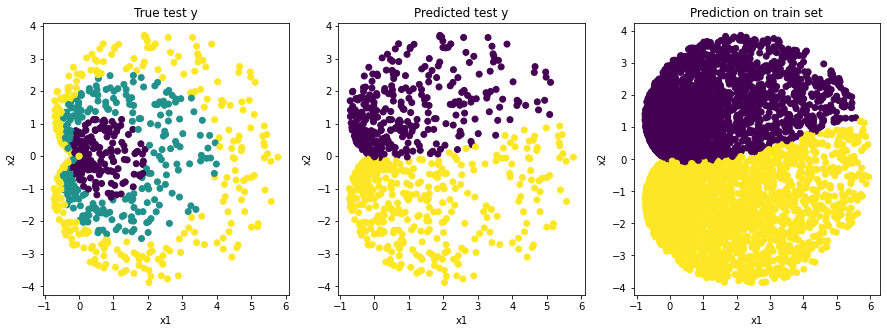

Epoch:  0 Accuracy:  38.4 %


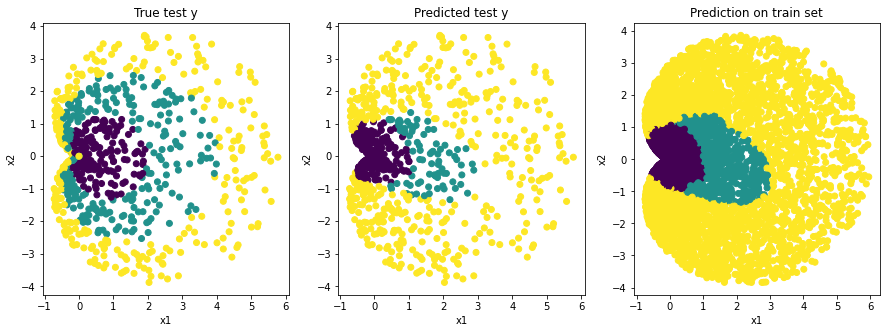

Epoch:  200 Accuracy:  53.6 %


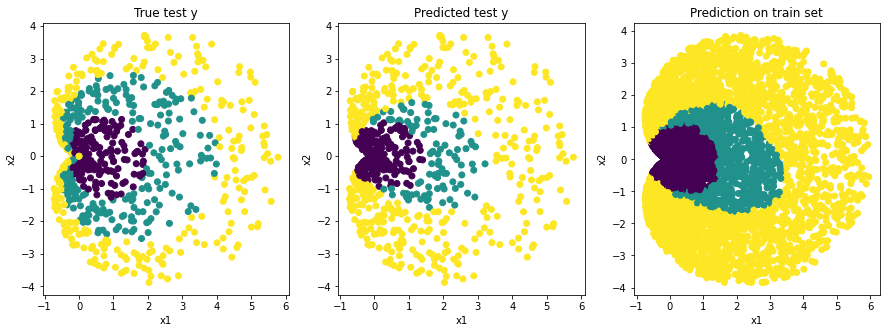

Epoch:  400 Accuracy:  60.199999999999996 %


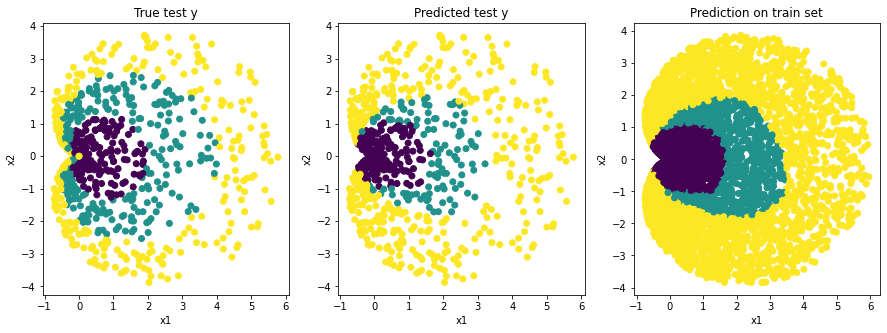

Epoch:  600 Accuracy:  63.5 %


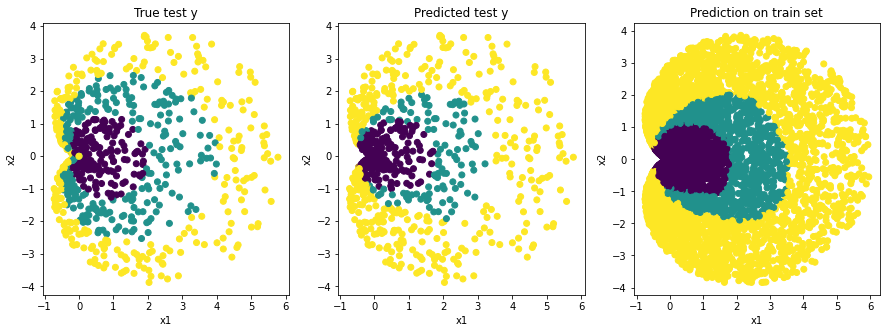

Epoch:  800 Accuracy:  66.2 %


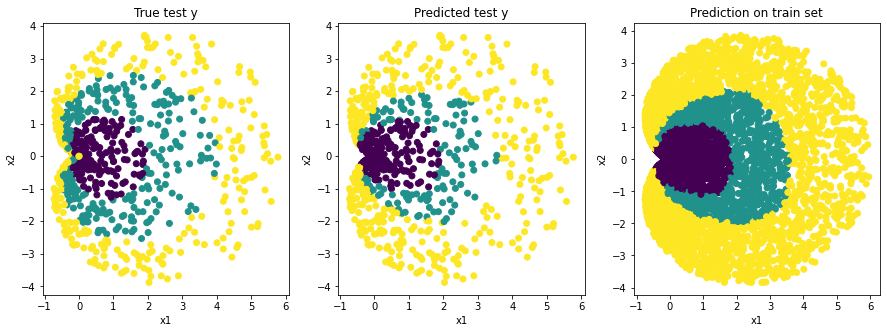

Epoch:  1000 Accuracy:  69.39999999999999 %


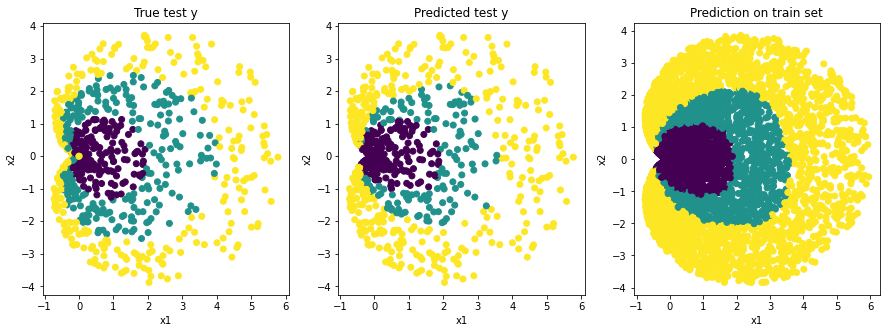

Epoch:  1200 Accuracy:  71.3 %


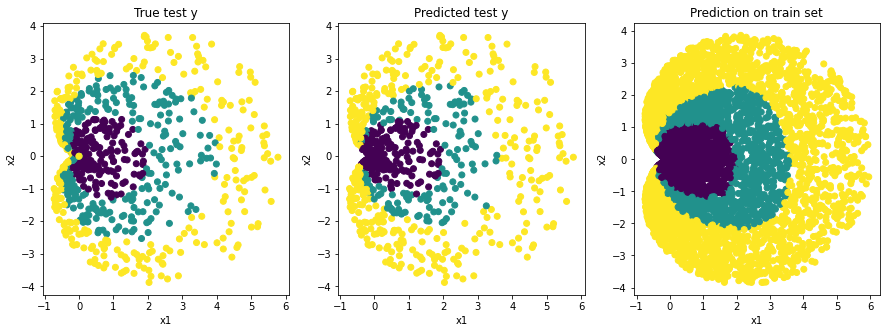

Epoch:  1400 Accuracy:  72.6 %


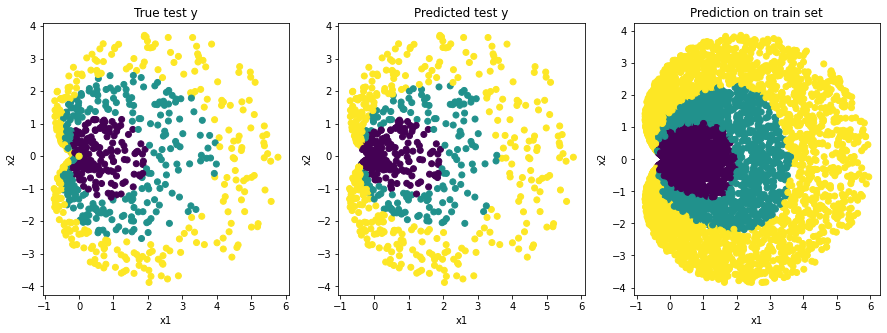

Epoch:  1600 Accuracy:  72.89999999999999 %


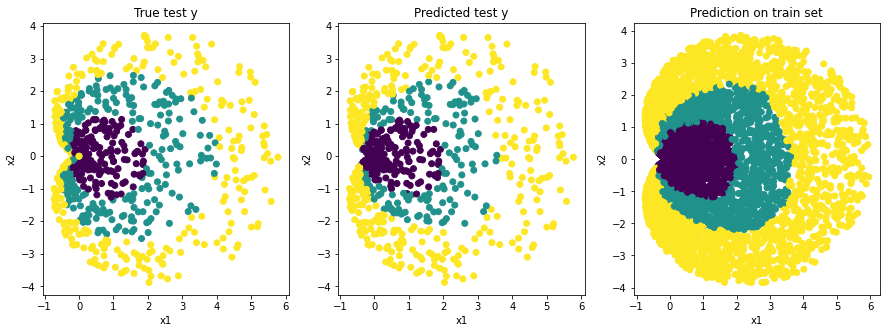

Epoch:  1800 Accuracy:  73.5 %


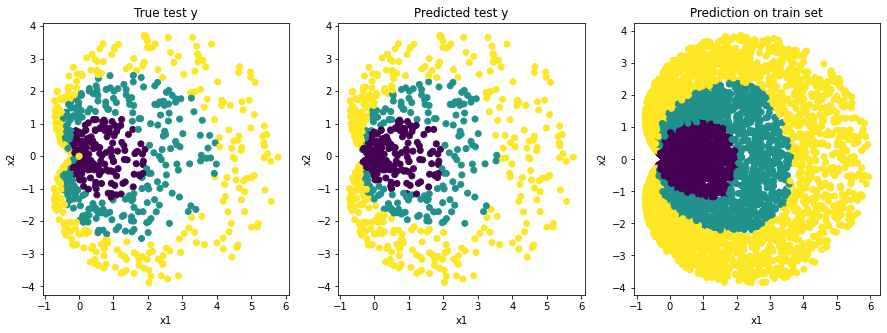

Epoch:  2000 Accuracy:  74.1 %


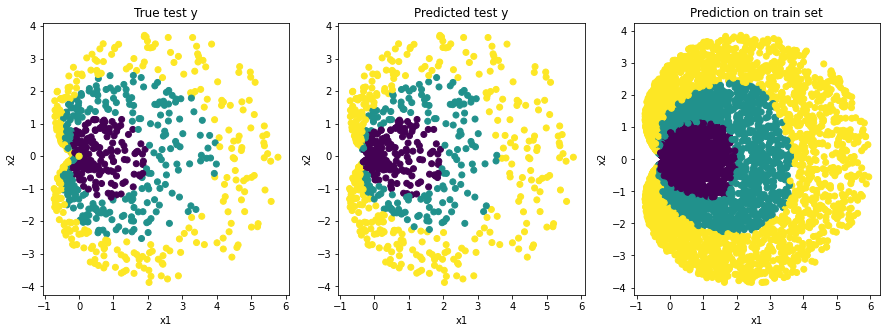

Epoch:  2200 Accuracy:  75.0 %


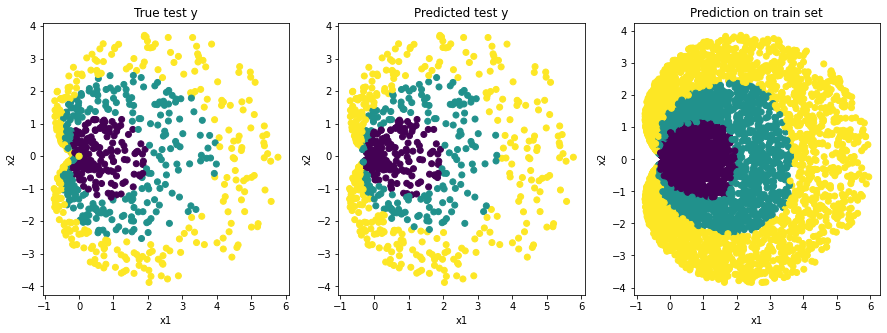

Epoch:  2400 Accuracy:  75.3 %


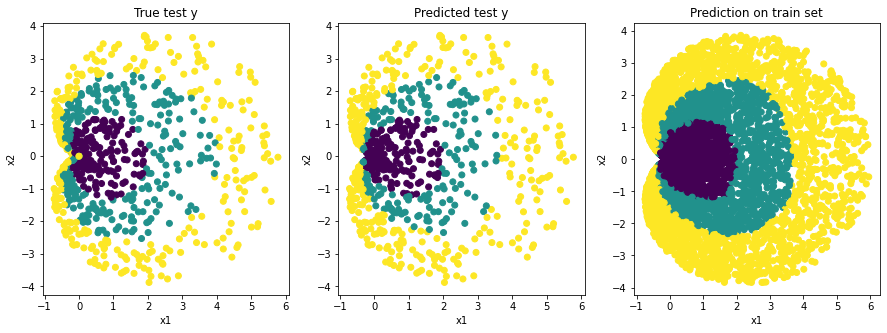

Epoch:  2600 Accuracy:  75.5 %


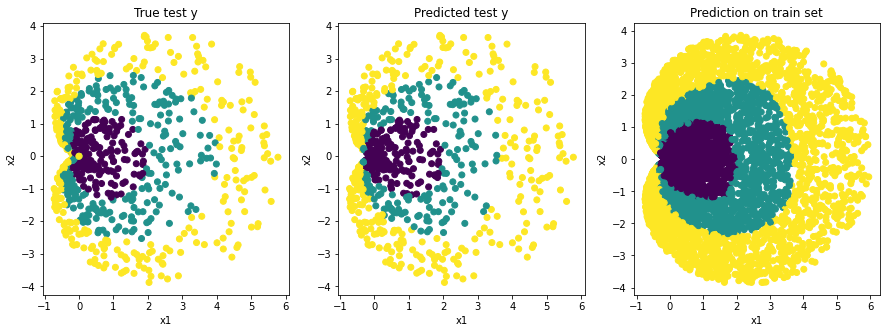

Epoch:  2800 Accuracy:  75.9 %


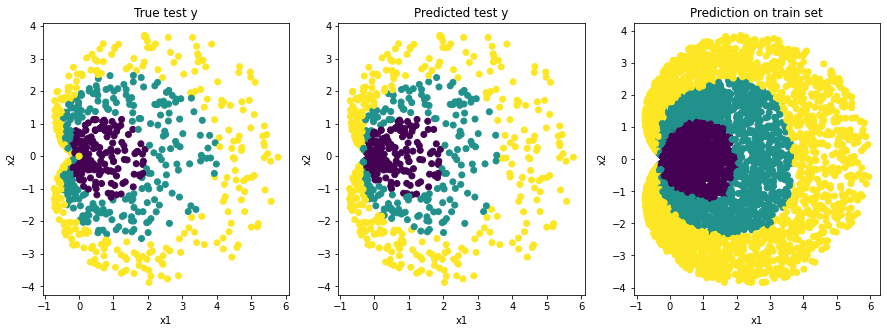

Epoch:  3000 Accuracy:  76.2 %


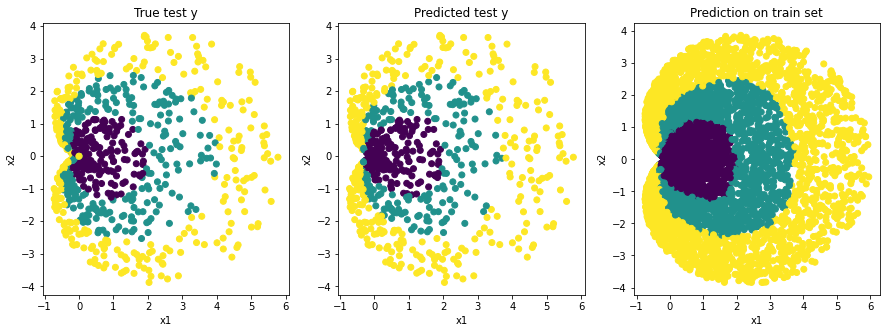

Epoch:  3200 Accuracy:  76.6 %


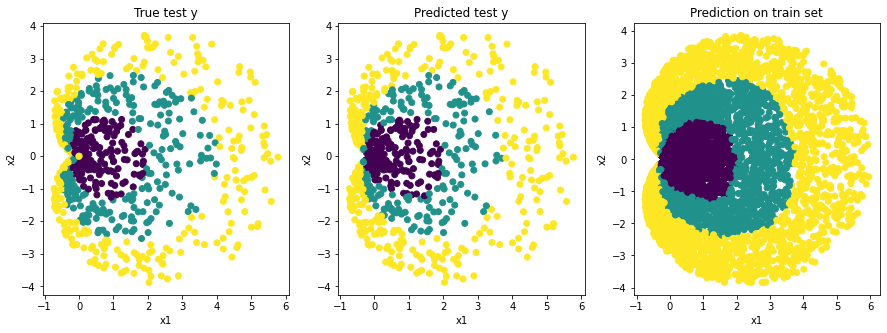

Epoch:  3400 Accuracy:  76.9 %


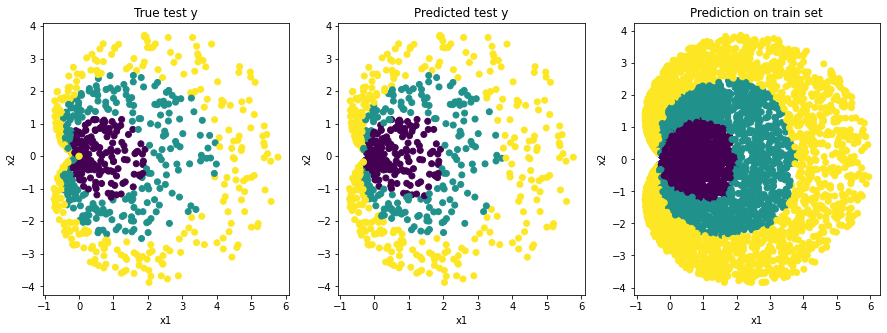

Epoch:  3600 Accuracy:  77.4 %


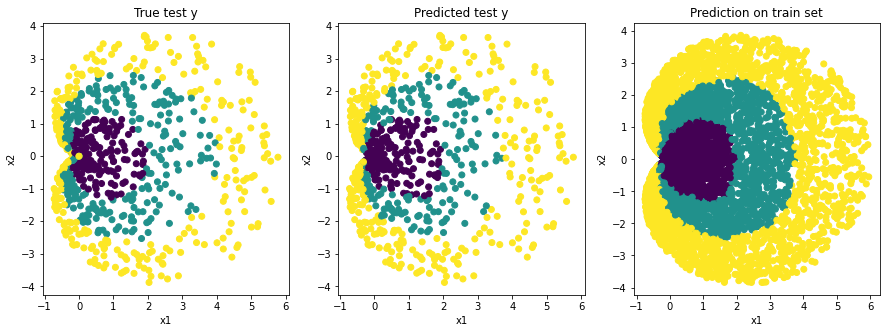

Epoch:  3800 Accuracy:  77.4 %


In [5]:
import torch.optim as optim
from sklearn.metrics import accuracy_score


#Construct Model 
model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

model = MLPModel() # Model을 생성
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 복잡해보이지만 간단히 모델 내에 학습을 당할 파라미터 수를 카운팅하는 코드입니다.

# Construct Optimizer 
lr = 0.005 # Learning Rate 하나 정하기
optimizer = optim.SGD(model.parameters(), lr=lr) # Optimizer를 생성

# 매 학습 단계에서의 epoch값과 그 때의 loss 값을 저장할 리스트를 만들어줌
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 4000 # 학습 횟수(epoch)을 지정
for i in range(epoch):
    
    #  Train
    model.train() # model을 train 모드로 세팅. 반대로 향후 모델을 평가할 때는 eval() 모드로 변경
    optimizer.zero_grad() # optimizer에 남아있을 수도 있는 잔여 그라디언트를 0으로 다 초기화
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y).long()
    pred_y = model(input_x)  ## input값으로 pred 만듬
    #print(input_x.shape, true_y.shape, pred_y.shape)
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward() # backward()를 통해서 그라디언트를 구하기
    optimizer.step() # step()을 통해서 그라디언틀를 바탕으로 파라미터를 업데이트 하기
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    
    # Validation
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y).long()
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    #  Evaluation 
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포 그리기
        
        #  Calculate Accuracy 
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의!!!
        list_acc.append(acc)
        list_acc_epoch.append(i)

        fig = plt.figure(figsize=(15,5))
        
        # True Y Scattering
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        # Predicted Y Scattering 
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(test_X[:, 0], test_X[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')
        
        # Just for Visualizaing with High Resolution
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(train_X[:, 0], train_X[:, 1], c=pred_y)
        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_title('Prediction on train set')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

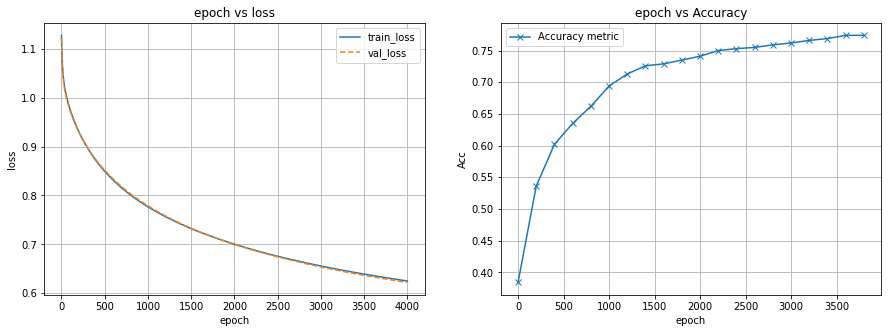

In [6]:
fig = plt.figure(figsize=(15,5))

#Loss Fluctuation 
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# Metric Fluctuation 
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()